In [2]:
# Linear Regression: Decomposition Method
# ----------------------------------
#
# This function shows how to use Tensorflow to
# solve linear regression via the matrix inverse.
#
# Given Ax=b, and a Cholesky decomposition such that
#  A = L*L' then we can get solve for x via
# 1) L*y=t(A)*b
# 2) L'*x=y

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.python.framework import ops

ops.reset_default_graph()

# Create graph
sess = tf.Session()

In [7]:
# Create the data
x_vals = np.linspace(0,10,10)
y_vals = x_vals + np.random.normal(0,1,10)
print(x_vals,y_vals)

[  0.           1.11111111   2.22222222   3.33333333   4.44444444
   5.55555556   6.66666667   7.77777778   8.88888889  10.        ] [ 0.97235689  0.82839985  1.18488597  2.61806169  3.98433537  5.52235255
  6.47234884  8.57531315  9.97425991  9.42593583]


In [8]:
# Create design matrix
x_val_column = np.transpose(np.matrix(x_vals))
ones_column = np.transpose(np.matrix(np.repeat(1,10)))
A = np.column_stack((x_val_column,ones_column))
print("random.normal:", np.random.normal(0, 1, 10))
print("A:", A)

random.normal: [-0.69131435 -0.47033488 -2.12819858 -1.10414226  0.62351844 -0.91854521
  0.01138745  0.06846969  1.55617937  0.5319269 ]
A: [[  0.           1.        ]
 [  1.11111111   1.        ]
 [  2.22222222   1.        ]
 [  3.33333333   1.        ]
 [  4.44444444   1.        ]
 [  5.55555556   1.        ]
 [  6.66666667   1.        ]
 [  7.77777778   1.        ]
 [  8.88888889   1.        ]
 [ 10.           1.        ]]


In [19]:
# Create b matrix
b = np.transpose(np.matrix(y_vals))
# Create tensors
A_tensor = tf.constant(A)
b_tensor = tf.constant(b)
# Find Cholesky Decomposition
tA_A = tf.matmul(tf.transpose(A_tensor),A_tensor)
L = tf.cholesky(tA_A)
print(sess.run(tA_A))
print(sess.run(tf.matmul(L,tf.transpose(L))))
# Solve L*y=t(A)*b
tA_b = tf.matmul(tf.transpose(A_tensor),b)
solve_1 = tf.matrix_solve(L,tA_b)
print(solve_1)

[[ 351.85185185   50.        ]
 [  50.           10.        ]]
[[ 351.85185185   50.        ]
 [  50.           10.        ]]
Tensor("MatrixSolve_5:0", shape=(2, 1), dtype=float64)


In [14]:
# Solve L' * y = sol1
solve_2 = tf.matrix_solve(tf.transpose(L),solve_1)
print(solve_2)
solution_eval = sess.run(solve_2)
print(solution_eval)

Tensor("MatrixSolve_2:0", shape=(2, 1), dtype=float64)
[[ 1.03721588]
 [-0.23025441]]


slope: 1.03721588367
y_intercept: -0.230254413058


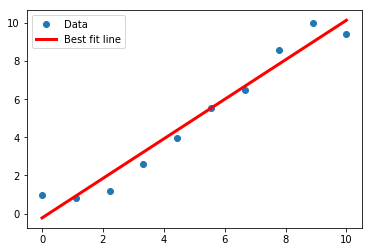

In [15]:
# Extract coefficients
slope = solution_eval[0][0]
y_intercept = solution_eval[1][0]

print('slope: ' + str(slope))
print('y_intercept: ' + str(y_intercept))

# Get best fit line
best_fit = []
for i in x_vals:
    best_fit.append(slope * i + y_intercept)

# Plot the results
plt.plot(x_vals, y_vals, 'o', label='Data')
plt.plot(x_vals, best_fit, 'r-', label='Best fit line', linewidth=3)
plt.legend(loc='upper left')
plt.show()